## **1. IMPORT ALL THE LIBRARIES**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.pipeline import Pipeline

## **2. READING THE DATA**

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/shivamm-verma/AAI_Risk-analysis_Fault-Prediction/refs/heads/main/Model/dataset/LandingGear_Balanced_Dataset.csv")
df.head()

,RunID,Max_Deflection,Max_Velocity,Settling_Time,Mass,K_Stiffness,B_Damping,Fault_Code,RUL
0,1,0.3,0.592124,0.330689,4653.503425,156086.879056,3850.794727,0,97.220855
1,2,0.3,0.619103,0.345473,3187.526077,143963.106075,3911.399288,0,94.485389
2,3,0.3,0.589439,0.330372,4882.371127,156973.328028,3863.045233,0,99.362603
3,4,0.3,0.594537,0.348994,1567.545355,149780.634731,4120.112188,0,99.357504
4,5,0.3,0.579618,0.341858,4837.969706,156236.032878,4116.882932,0,91.326419


In [7]:
df['Fault_Code'].value_counts()

,count
Fault_Code,
1,500
2,500
0,300
3,200


Fault_Code: Ground Truth Classification Target

0: Normal Operation

1: Nitrogen Gas Leak (Reduced Stiffness)

2: Worn Seal (Reduced Damping)

3: Early Structural Degradation



In [ ]:
df.corr()

,RunID,Max_Deflection,Max_Velocity,Settling_Time,Mass,K_Stiffness,B_Damping,Fault_Code,RUL
RunID,1.000000,0.147992,0.457278,0.377403,0.022106,0.063801,-0.635728,0.953974,-0.431740
Max_Deflection,0.147992,1.000000,0.371316,0.440938,0.004778,0.077381,-0.332345,0.074672,-0.241435
Max_Velocity,0.457278,0.371316,1.000000,0.822660,0.001803,-0.521289,-0.550056,0.258224,-0.949886
Settling_Time,0.377403,0.440938,0.822660,1.000000,0.011327,-0.102095,-0.753429,0.181525,-0.814744
Mass,0.022106,0.004778,0.001803,0.011327,1.000000,0.029710,-0.039554,0.026843,-0.006955
K_Stiffness,0.063801,0.077381,-0.521289,-0.102095,0.029710,1.000000,-0.390826,0.134828,0.530666
B_Damping,-0.635728,-0.332345,-0.550056,-0.753429,-0.039554,-0.390826,1.000000,-0.502608,0.529527
Fault_Code,0.953974,0.074672,0.258224,0.181525,0.026843,0.134828,-0.502608,1.000000,-0.214786
RUL,-0.431740,-0.241435,-0.949886,-0.814744,-0.006955,0.530666,0.529527,-0.214786,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RunID           1500 non-null   int64  
 1   Max_Deflection  1500 non-null   float64
 2   Max_Velocity    1500 non-null   float64
 3   Settling_Time   1500 non-null   float64
 4   Mass            1500 non-null   float64
 5   K_Stiffness     1500 non-null   float64
 6   B_Damping       1500 non-null   float64
 7   Fault_Code      1500 non-null   int64  
 8   RUL             1500 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 105.6 KB


In [ ]:
df.describe()

,RunID,Max_Deflection,Max_Velocity,Settling_Time,Mass,K_Stiffness,B_Damping,Fault_Code,RUL
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,0.300018,0.673895,0.393192,3013.640972,136978.482654,3431.891548,1.400000,62.102630
std,433.157015,0.000156,0.071852,0.069448,1156.133997,19948.112877,848.728578,0.952508,29.634244
min,1.000000,0.300000,0.574557,0.317767,1001.365849,80000.000000,1000.000000,0.000000,0.000000
25%,375.750000,0.300000,0.614667,0.338473,2020.267452,131075.000000,3217.250000,1.000000,37.400000
50%,750.500000,0.300000,0.657142,0.365980,3062.448216,147287.835278,3891.532860,1.000000,72.062500
75%,1125.250000,0.300000,0.714344,0.444915,4010.413004,150000.000000,4000.000000,2.000000,87.653833
max,1500.000000,0.301976,0.914319,0.653655,4997.911435,157492.374301,4199.632158,3.000000,99.930846


In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix["RUL"].sort_values(ascending=False)

RUL               1.000000
K_Stiffness       0.530666
B_Damping         0.529527
Mass             -0.006955
Fault_Code       -0.214786
Max_Deflection   -0.241435
RunID            -0.431740
Settling_Time    -0.814744
Max_Velocity     -0.949886
Name: RUL, dtype: float64

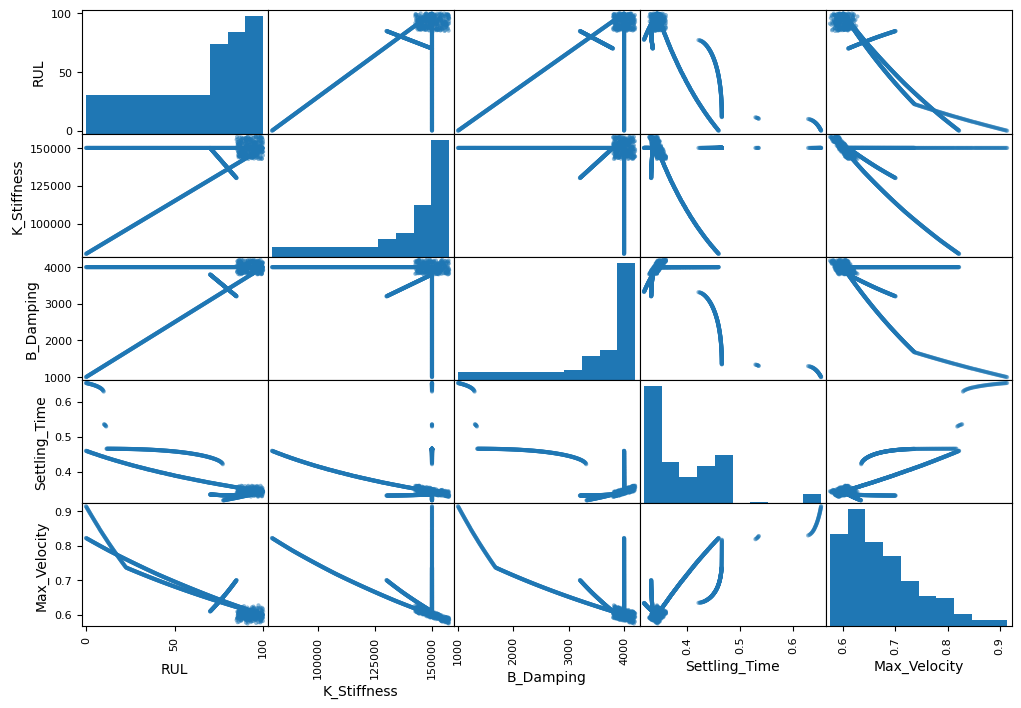

In [8]:
attributes = ["RUL","K_Stiffness","B_Damping","Settling_Time","Max_Velocity"]
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

In [9]:
df["Stiffness_Damping_Product"] = df["K_Stiffness"] * df["B_Damping"]

In [10]:
corr_matrix = df.corr()
corr_matrix["RUL"].sort_values(ascending=False)

,RUL
RUL,1.000000
Stiffness_Damping_Product,0.911977
K_Stiffness,0.530666
B_Damping,0.529527
Mass,-0.006955
Fault_Code,-0.214786
Max_Deflection,-0.241435
RunID,-0.431740
Settling_Time,-0.814744
Max_Velocity,-0.949886


In [11]:
X,y = df.drop(columns="RUL"), df['RUL']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)
pd.DataFrame({'cols':X_train.columns,'yeo-johnson_lambdas':pt.lambdas_})

,cols,yeo-johnson_lambdas
0,RunID,0.737431
1,Max_Deflection,-112.751821
2,Max_Velocity,-9.401228
3,Settling_Time,-11.261899
4,Mass,0.863981
5,K_Stiffness,6.775751
6,B_Damping,3.217138
7,Fault_Code,0.803347
8,Stiffness_Damping_Product,1.760860


/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


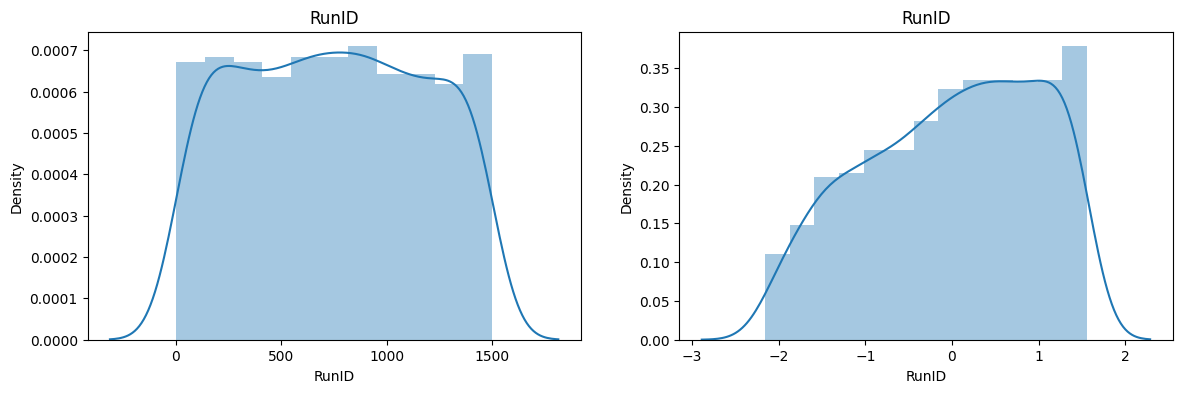

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


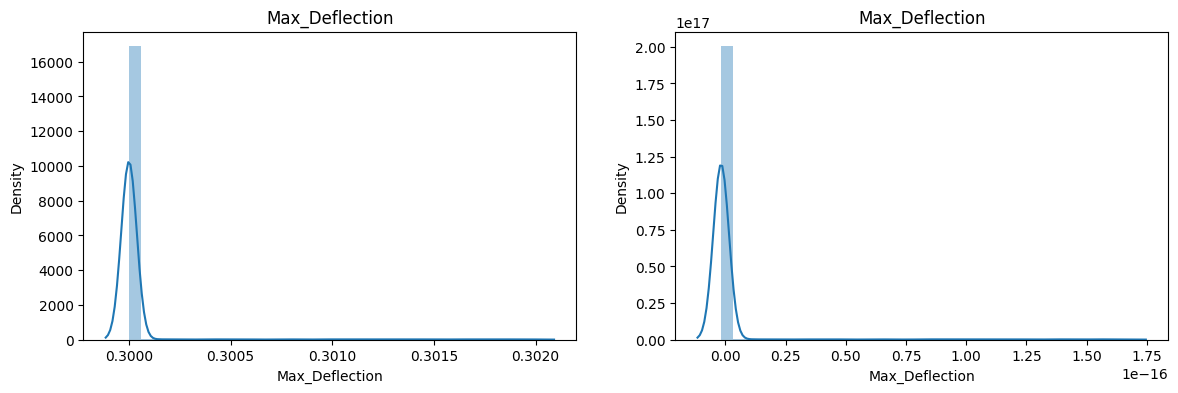

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


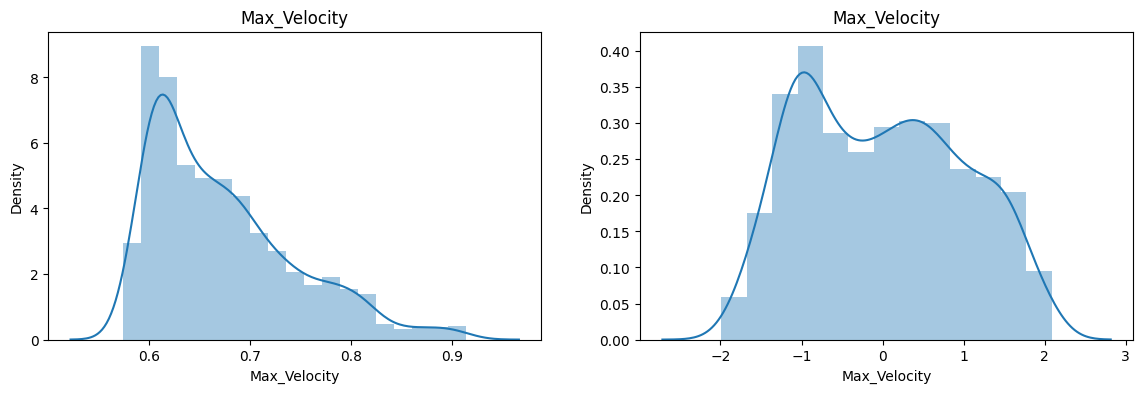

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


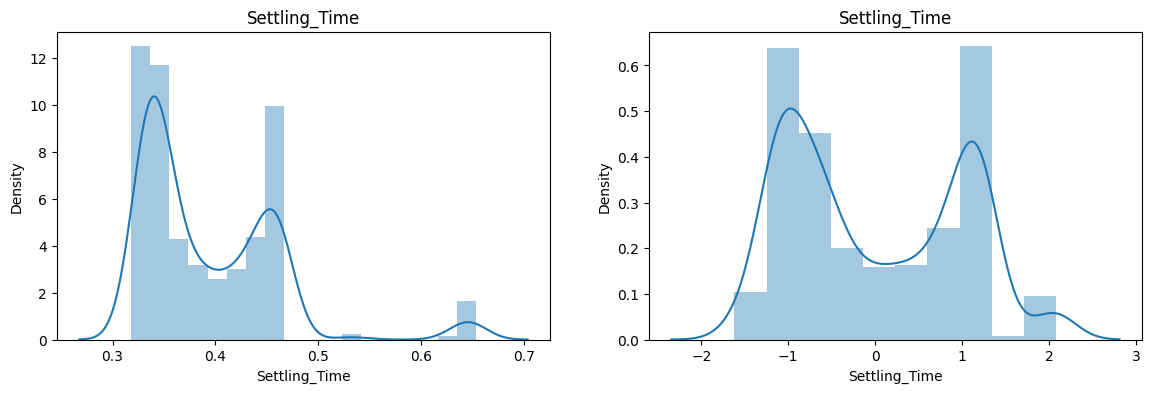

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


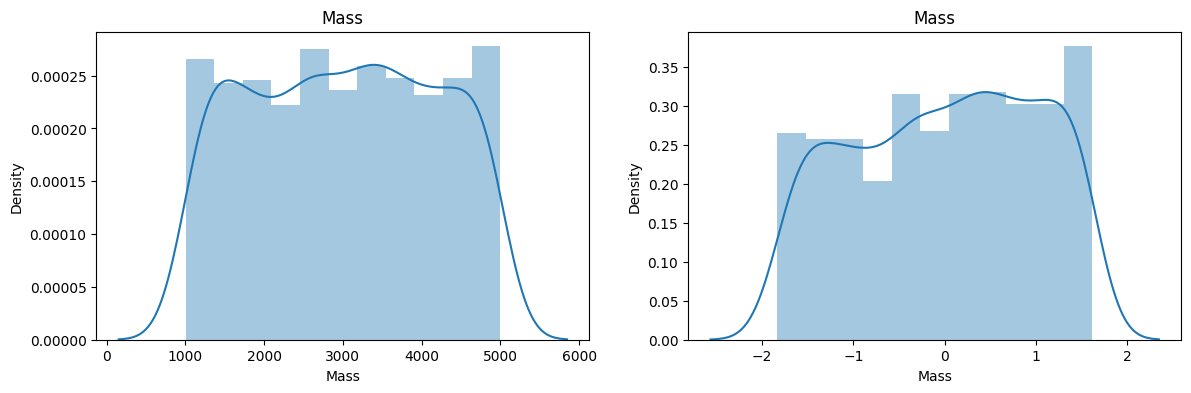

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


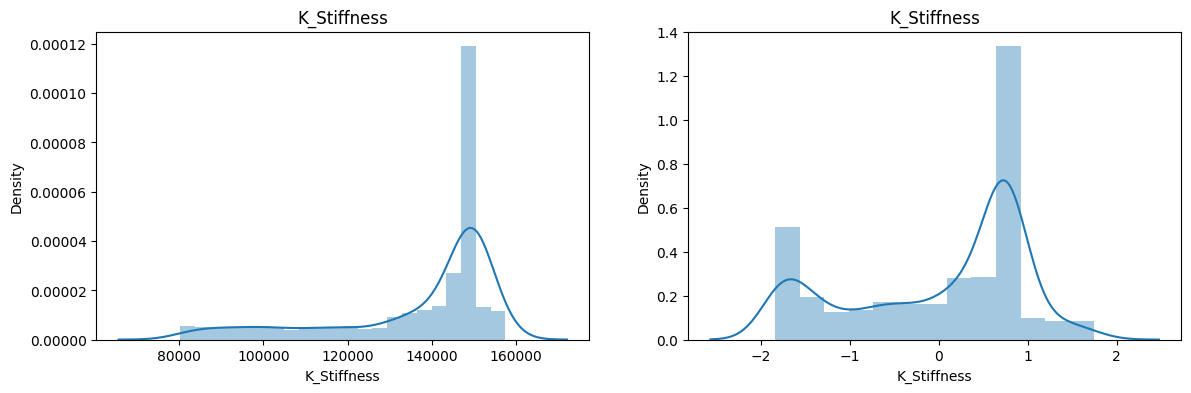

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


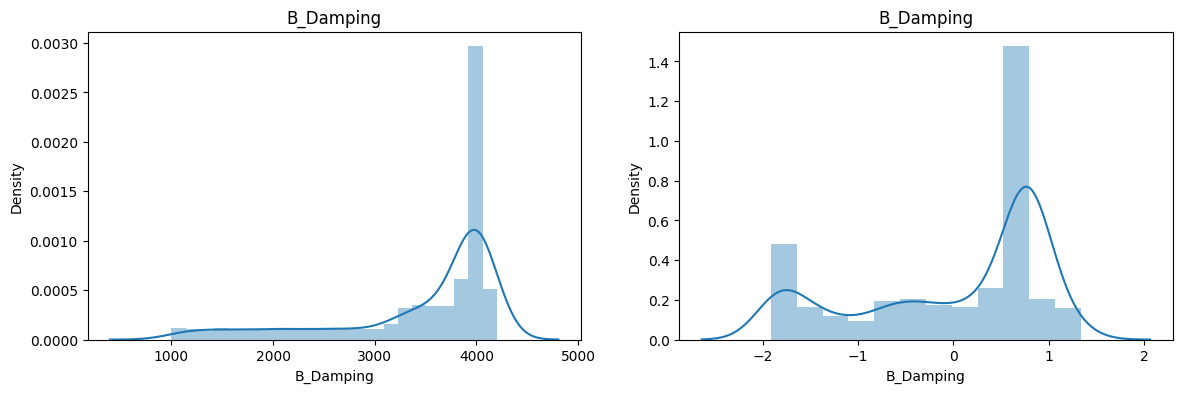

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


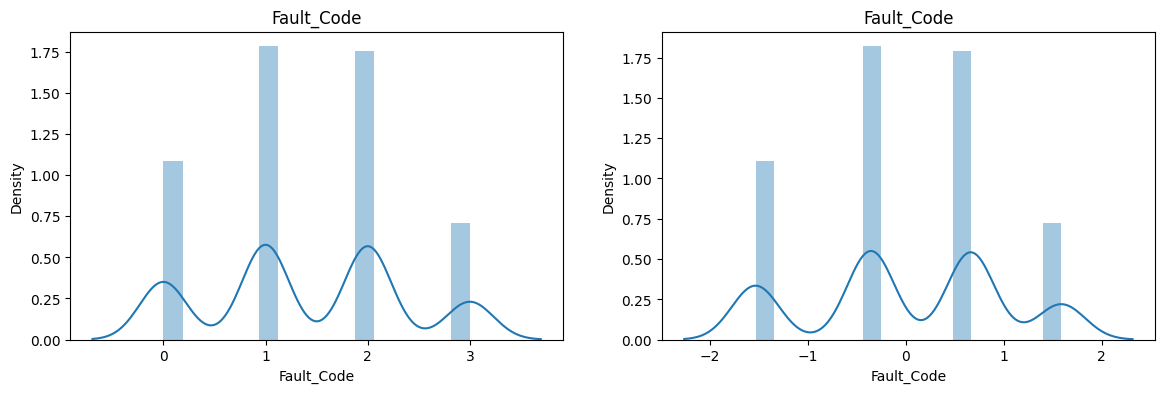

/tmp/ipython-input-3065204432.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
/tmp/ipython-input-3065204432.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


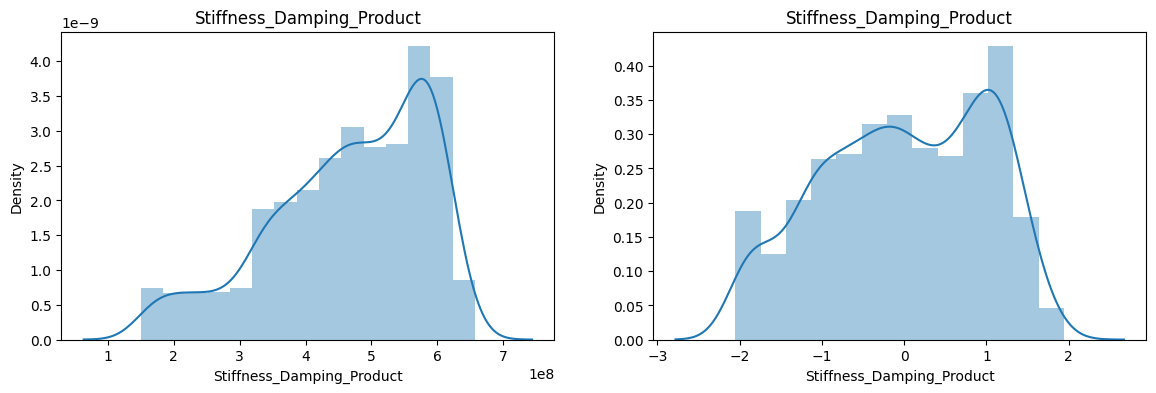

In [14]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)

  plt.show()

In [15]:
model = LinearRegression()
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
r2_score(y_test,y_pred)

0.973303074243093

In [17]:
np.mean(cross_val_score(model,X_train,y_train,scoring="r2",cv=10))

np.float64(0.9848751483755478)

In [18]:
with open("LandingGearRUL.pkl","wb") as f:
  pickle.dump(model,f)

In [19]:
pipe = Pipeline([
    ("scaler", PowerTransformer()),
    ("linreg", LinearRegression())
])

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', PowerTransformer()), ('linreg', LinearRegression())])

In [21]:
y_pred_train = pipe.predict(X_train)

In [22]:
scores = cross_val_score(pipe, X_train, y_train, cv=5)
scores

array([0.98526417, 0.9826364 , 0.98121832, 0.98113837, 0.98828416])

In [24]:
with open("LandingGearRUL.pkl","wb") as f:
  pickle.dump(pipe,f)